In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D


# Part.1 Data visualization

In [3]:
data=pd.read_csv("football_data.csv")


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## histograms of count of players for heights

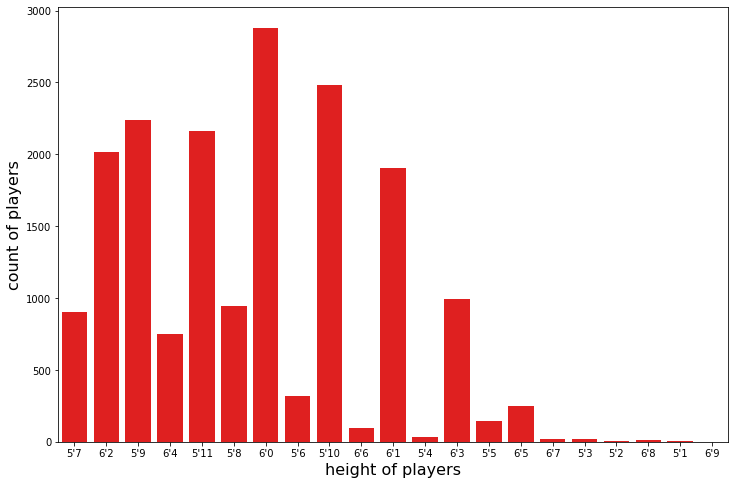

In [5]:
plt.figure(figsize=(12,8))
x=sns.countplot('Height',data=data,color='red')
x.set_xlabel(xlabel = 'height of players', fontsize = 16)
x.set_ylabel(ylabel="count of players",fontsize=16)
plt.show()

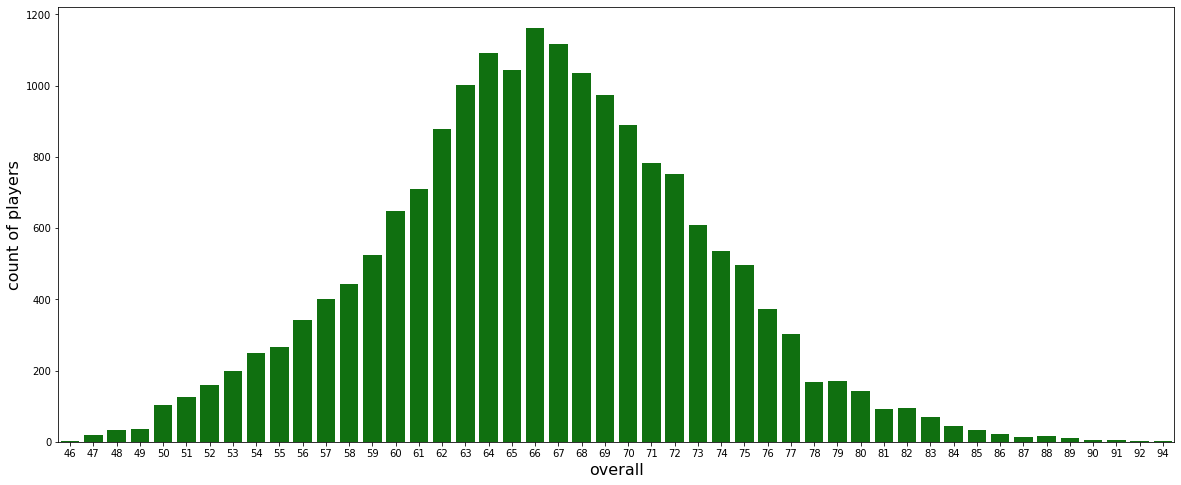

In [6]:
plt.figure(figsize=(20,8))
x=sns.countplot('Overall',data=data,color='green')
x.set_xlabel(xlabel = 'overall', fontsize = 16)
x.set_ylabel(ylabel="count of players",fontsize=16)
plt.show()

# Outliers:
from the above histogram we can see that observe that only very few playes are above 92 overall score. Hence, those are outliers. Bellow are some outliers:

In [7]:
lis=list(data['Name'][data['Overall']>=92])
print(lis)

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr']


# histograms of count of players for Stamina

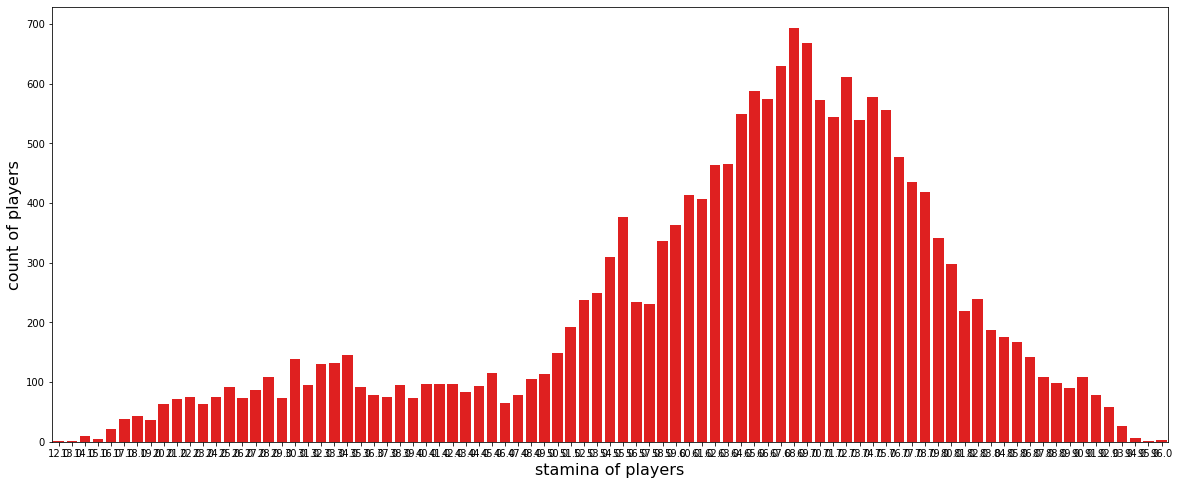

In [8]:
plt.figure(figsize=(20,8))
x=sns.countplot('Stamina',data=data,color='red')
x.set_xlabel(xlabel = 'stamina of players', fontsize = 16)
x.set_ylabel(ylabel="count of players",fontsize=16)
plt.show()

## Features of players according to their position

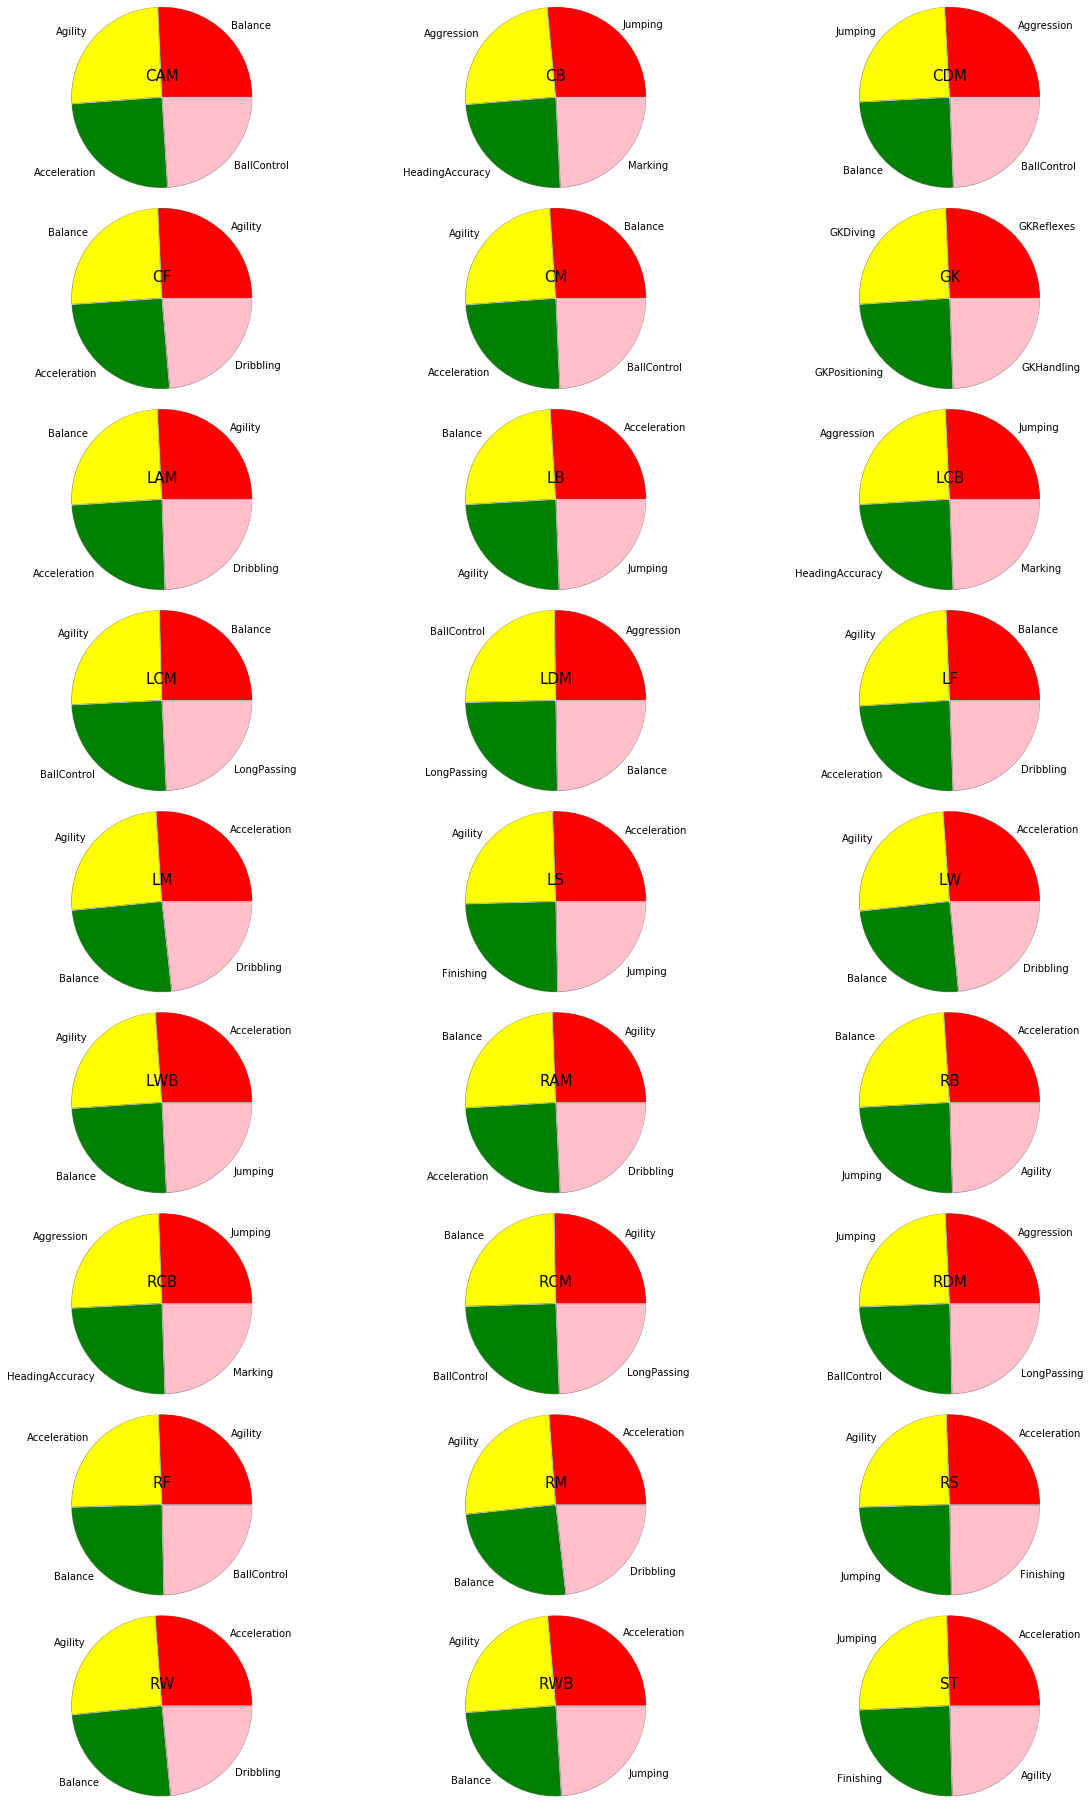

In [9]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')
idx = 1

plt.subplots(figsize=(20, 30))
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    
    top_features=dict(val.nlargest(4))
    

    labels = top_features.keys()
    size = top_features.values()
    colors = ['red', 'yellow', 'green', 'pink']
    explode = [0.1, 0.1, 0.1, 0.1]
    
   
    plt.subplot(9, 3, idx)
#     plt.subplots(figsize=(2, 2))
    plt.subplots_adjust(hspace=8)
    
    plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True,radius=10)
    plt.title(i, fontsize = 15)
#     plt.legend()
#     plt.show()
    idx=idx+1
plt.show()

## Distribution of players in different clubs/country on the basis of some attribute.

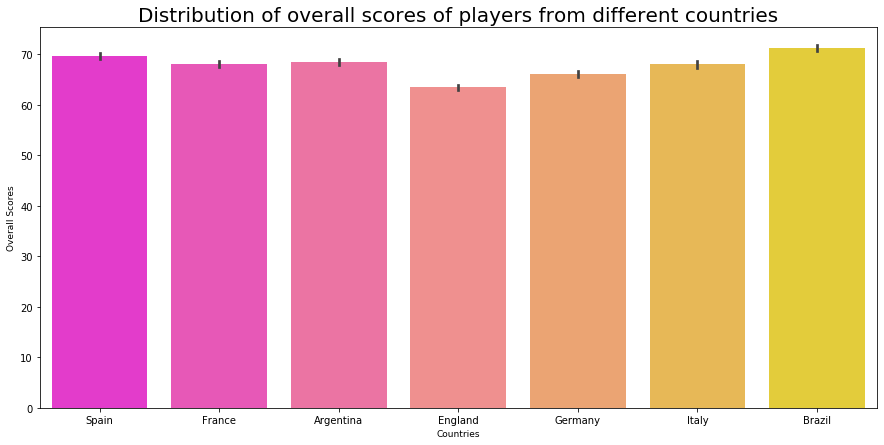

In [10]:


# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()



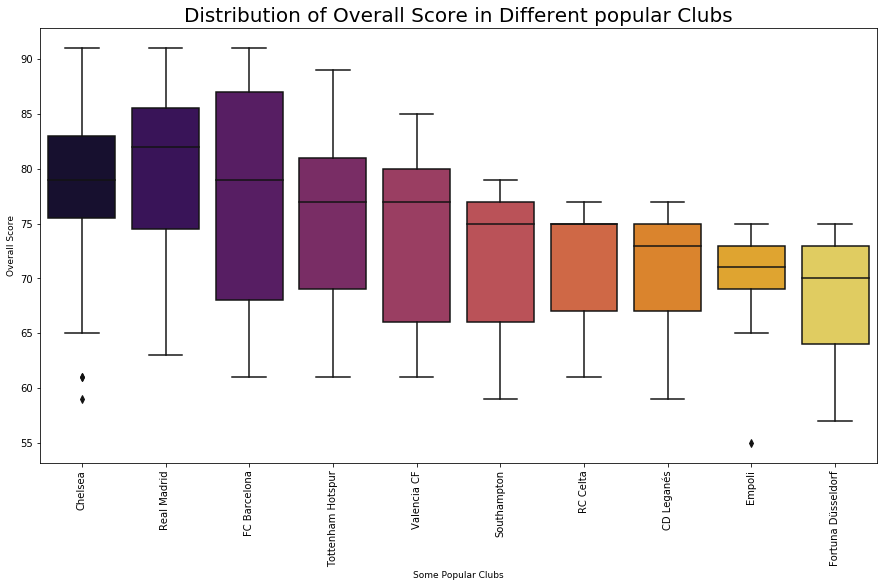

In [12]:



some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()




### Checking null values

In [13]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [14]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

###  Data Cleaning

In [15]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [16]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null fl

In [17]:
data.fillna(0,inplace=True)

In [18]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null fl

## Drop non numerical columns

In [19]:

columns_to_delete=[]
for i in range(data.shape[1]):
#     isinstance("this is a string", str)
    if  isinstance(data.iloc[0,i],str):
        columns_to_delete.append(i)
#         print(i)
data.drop(data.columns[columns_to_delete], axis = 1, inplace = True)
data.drop(data.columns[[0]], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 43 columns):
ID                          18207 non-null int64
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Jersey Number               18207 non-null float64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 non-null float64
LongPassing                 18207 

## PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data)
pca = PCA(n_components=3)
New_Data=pca.fit_transform(x)

# Part 3. Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=0).fit(New_Data)

In [22]:
clustering.labels_

array([13263, 17759,  9727, ...,     3,     1,     0])

In [23]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


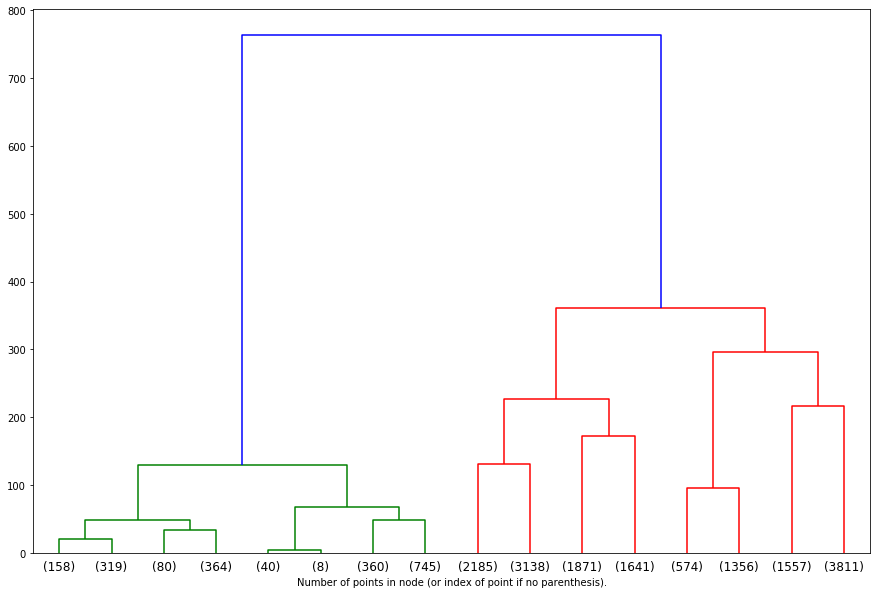

In [24]:
plt.subplots(figsize=(15,10))
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [25]:
clustering.fit_predict(New_Data)

array([13263, 17759,  9727, ...,     3,     1,     0])

## Hierarchical Clustering visualization

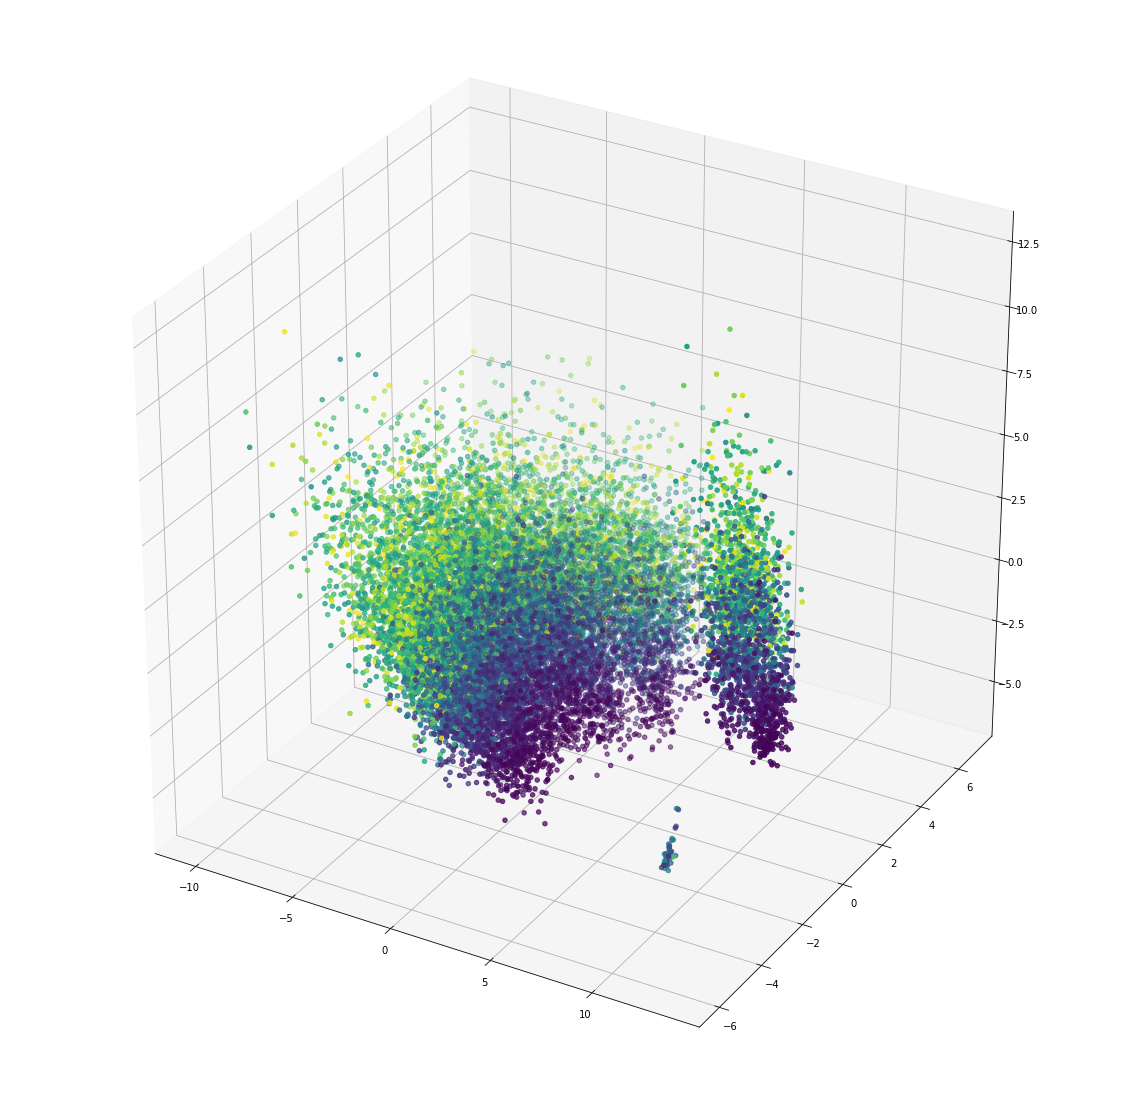

<Figure size 720x504 with 0 Axes>

In [26]:
fig = plt.figure(figsize=(20, 20))
plt.figure(figsize=(10, 7))  
ax = fig.add_subplot(111, projection='3d')
ax.scatter(New_Data[:,0],New_Data[:,1],New_Data[:,2],c=clustering.labels_)

## Part.4  DBSCAN

In [27]:
# x = StandardScaler().fit_transform(data)

pca1 = PCA(n_components=3)
New_Data1=pca1.fit_transform(x)
from sklearn.cluster import DBSCAN


## Cluster using different eps
Used two values for eps .8 and 100. At 100 all the points merged into single cluster. For eps .8 we got 3 clusters which seams reasonable after seeing visualization. Hence we choose .8 as eps.

Text(0.5, 0.92, 'EPS 100')

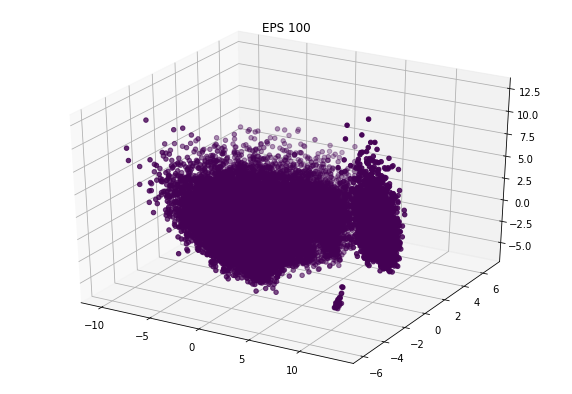

In [41]:
cluster = DBSCAN(eps=10, min_samples=4).fit(New_Data1)
cluster.fit_predict(New_Data1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(New_Data1[:,0],New_Data1[:,1],New_Data1[:,2],c=cluster.labels_)
plt.title('EPS 10')


Text(0.5, 0.92, 'EPS .8')

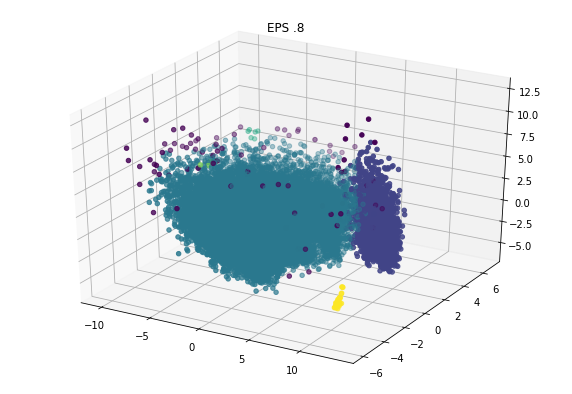

In [52]:
cluster = DBSCAN(eps=.8, min_samples=4).fit(New_Data1)
cluster.fit_predict(New_Data1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(New_Data1[:,0],New_Data1[:,1],New_Data1[:,2],c=cluster.labels_)
plt.title('EPS .8')
    

# Silhouette Score plot for various eps

3 4


Text(0, 0.5, 'Silhouette Score')

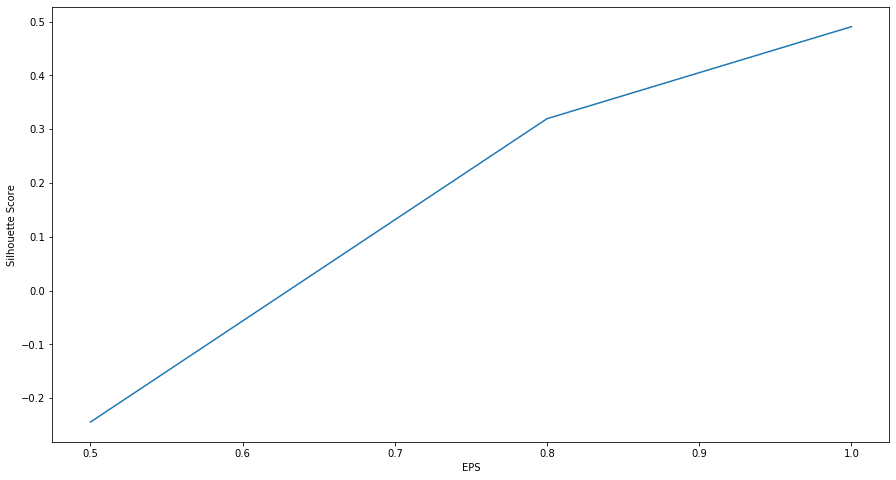

In [50]:
from sklearn.metrics import silhouette_score

sil = []
eps = [.5,.8,1]

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for e in eps:
  cluster = DBSCAN(eps=e, min_samples=4).fit(New_Data1)
  cluster.fit_predict(New_Data1)
  labels = cluster.labels_
  sil.append(silhouette_score(New_Data1, labels))


    

print(len(sil),len(sz))

plt.plot(eps,sil)
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')

# Part.2 K-means clustering

In [32]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
from spacy.lang import en
from sklearn.preprocessing import normalize
import random
import numpy as np
import pandas as pd
from collections import Counter

def read_file(directory):
    files = os.listdir(directory)
    
    content_list=[]
    for f in files:
        with open(directory+f,encoding="utf8",errors='ignore') as fp:
            t=fp.read()
            content_list.append(t)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(content_list)
    x_norm=normalize(X)
    arr_n=x_norm.toarray()
    return arr_n
def read_file1(directory):
    files = os.listdir(directory)
    
    content_list=[]
    label_list=[]
    for f in files:
        f1,s=f.split('_')
        l=s[0]
        label_list.append(l)
        with open(directory+f,encoding="utf8",errors='ignore') as fp:
            t=fp.read()
            content_list.append(t)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(content_list)
    x_norm=normalize(X)
    arr_n=x_norm.toarray()
    return arr_n,label_list

def create_center_dict(centers,arr_n,k):
#     center_dict={0: [], 1: [], 2: [], 3: [],4: []}
    center_dict={}
    for i in range(k):
        center_dict[i]=[]
    
    
    
    n=arr_n.shape[0]
    
    for i in range(n):
        dis_center=[]
        for k in range(len(centers)):
            dis_center.append(np.linalg.norm(arr_n[i]-centers[k]))
            
        min_dis_center=min(dis_center)
        min_dis_center_index=dis_center.index(min_dis_center)
        center_dict[min_dis_center_index].append(i)

    
    return center_dict


def avg_row(row_list,arr_n):
    x=arr_n[row_list[0]]
    center=np.zeros(arr_n.shape[1])
#     print(center.shape)
    
    for i in row_list:
        for k in range(arr_n.shape[1]):
            center[k]=center[k]+arr_n[i,k]
    for k in range(arr_n.shape[1]):
        center[k]=center[k]/len(row_list)
           
    return center
            

def calculate_center(cluster_dict,arr_n,centers):
   
    for cluster in cluster_dict:
        if len(cluster_dict[cluster])!=0:
            centers[cluster ]=avg_row(cluster_dict[cluster],arr_n)
        

    return centers
    
def majority_poll(cluster_labels):  #majority element and its frequency out of a list
    d=Counter(cluster_labels)
    m=0;
    for (key,val) in d.items():
        if(val>m):
            m=val
            key1,val1=key,val
            
    return key1,val1
    
    
    
def cal_accuracy(cluster_dict,label):
    acc=0;
    for key in cluster_dict:
        cluster_labels=[]
        for val in cluster_dict[key]:
            cluster_labels.append(label[val])
        majority_key,occ=majority_poll(cluster_labels)
        acc=acc+occ/len(cluster_labels)

    return acc/len(cluster_dict.keys())
        
    
    
    


    
def training(data,k):
#     arr_n,label=read_file1(directory)
    arr_n=data
    
    it=100
    
    print(arr_n[1])
    centers=[]
    cluster_dict={}
    center_index=random.sample(range(0,1725), k)
    
    for e in center_index:
        centers.append(arr_n[e,:])
        
    for i in range(it):  #put it here
        cluster_dict=create_center_dict(centers,arr_n,k)
        centers = calculate_center(cluster_dict,arr_n,centers)
    
    index_cluster={}
    for cluster,lis in cluster_dict.items():
        for idx in lis:
            index_cluster[idx]=cluster
    pre_labels=[]
    for i in range(data.shape[0]):
        pre_labels.append(index_cluster[i])
    return pre_labels,centers
    
        
        
        
    
#         print(centers)
        
#     accuracy=cal_accuracy(cluster_dict,label)
#     print("Average clustering accuracy:",accuracy)
# #     return cluster_dict
        
        
        
        
     
        
        
    
labels,centers=training(New_Data1,4)

[-10.38891495  -2.12970389  10.32854247]


# elbow method plot for various k
    


In [33]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
#     kmeans = KMeans(n_clusters = k).fit(points)
#     centroids = kmeans.cluster_centers_
    pred_clusters,centroids =training(New_Data1,k)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

sse=calculate_WSS(New_Data1,5)

[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]


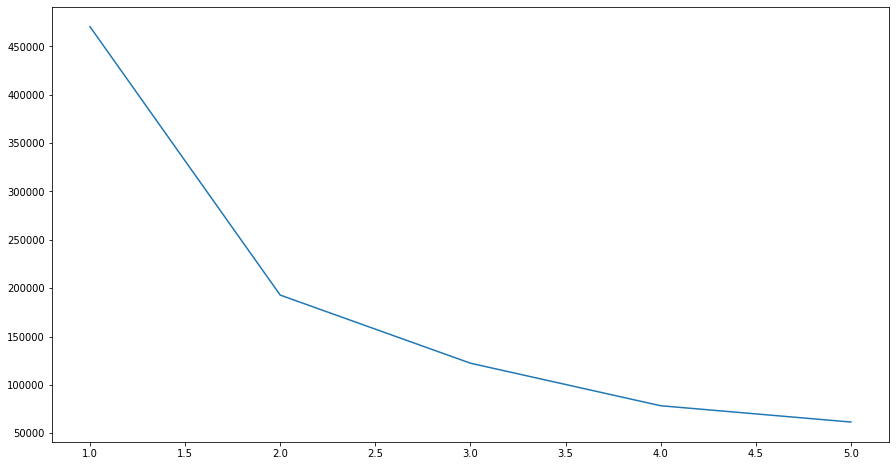

In [34]:
k1=[]
for i in range(1,6):
    k1.append(i)
plt.plot(k1,sse)

 # Silhouette Score vs no of clusters

[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
[-10.38891495  -2.12970389  10.32854247]
4 4


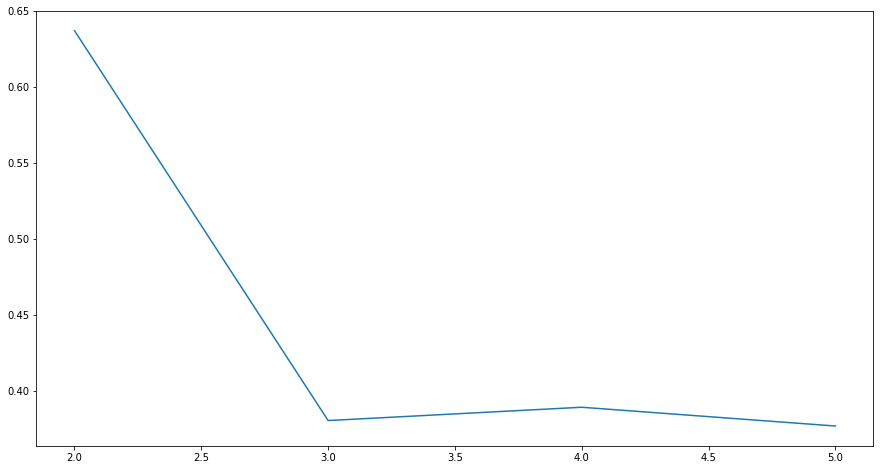

In [35]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 5

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  labels,centers = training(New_Data1,k)
  sil.append(silhouette_score(New_Data1, labels, metric = 'euclidean'))

sz=[]
for i in range(2,6):
    sz.append(i)
    

print(len(sil),len(sz))

plt.plot(sz,sil)

# From scratch k-means cluster visualization

In [36]:
labels,centers=training(New_Data1,3)
# print(New_Data1.shape)

[-10.38891495  -2.12970389  10.32854247]


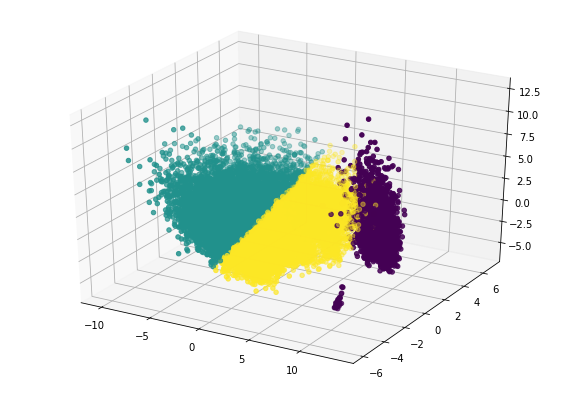

In [37]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(New_Data1[:,0],New_Data1[:,1],New_Data1[:,2],c=labels)

# Sklearn K-mean cluster visualization

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(New_Data1)
# kmeans.labels_

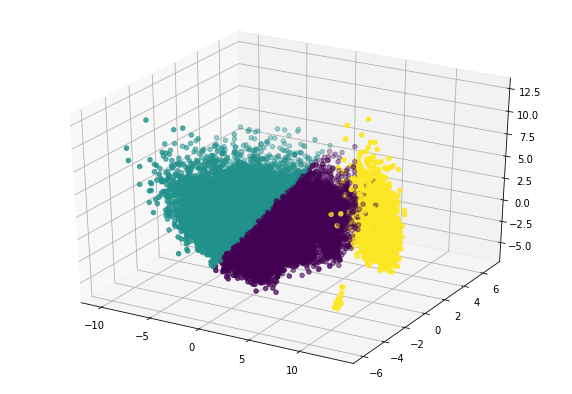

In [39]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(New_Data1[:,0],New_Data1[:,1],New_Data1[:,2],c=kmeans.labels_)